In [15]:
import pandas as pd
import numpy as np
import talib as ta
import pynance as pn
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('/content/GOOG_historical_data.csv')

In [7]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0


### Data cleaning
1.  check if the cloumn Dividends and Stock Split have null value

In [8]:
# check if all values in 'Dividends' and 'Stock Splits' are 0 or NaN
dividends_empty = data['Dividends'].eq(0).all() or data['Dividends'].isnull().all()
stock_splits_empty = data['Stock Splits'].eq(0).all() or data['Stock Splits'].isnull().all()

print(f"Dividends column is empty: {dividends_empty}")
print(f"Stock Splits column is empty: {stock_splits_empty}")

Dividends column is empty: False
Stock Splits column is empty: False


In [9]:
# see rows where 'Dividends' or 'Stock Splits' are not 0 or NaN
non_empty_dividends = data[data['Dividends'] != 0]
non_empty_splits = data[data['Stock Splits'] != 0]

print("Rows with non-zero Dividends:")
print(len(non_empty_dividends))

print("\nRows with non-zero Stock Splits:")
print(len(non_empty_splits))


Rows with non-zero Dividends:
1

Rows with non-zero Stock Splits:
3


Delete Column Dividends and Stock Splits

In [10]:
#total dataset
len(data)

5020

In [11]:
print(data.head())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.496292  897427216   
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.694573  458857488   
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.721690  366857939   
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.608991  306396159   
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.637103  184645512   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [12]:
data.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

### **Simple Moving Average (SMA)**
A rising SMA indicates an uptrend, while a falling SMA suggests a downtrend. When the stock price crosses above the SMA, it may signal a buying opportunity (bullish signal). Conversely, when the stock price crosses below the SMA, it could signal a sell opportunity (bearish signal).
The **SMA** is the unweighted average of the previous n data points. For example, the 50-day SMA is the average of the last 50 closing prices.
#### **Formula for SMA**:
SMA_t = (P_1 + P_2 + P_3 + ... + P_n) / n

##### **Where**:

- P_t is the closing price at time t,
- n is the number of periods (e.g., 50 for SMA_50),
- The sum is over the last n closing prices.

In [29]:
# Calculate 50-day Simple Moving Average (SMA)
data['SMA_50'] = ta.SMA(data['Close'], timeperiod=50)

# Calculate 200-day Simple Moving Average (SMA)
data['SMA_200'] = ta.SMA(data['Close'], timeperiod=200)

print(data[['Close', 'SMA_50', 'SMA_200']].tail())  # Shows the last few rows


                 Close    SMA_50    SMA_200
Date                                       
2024-07-24  174.369995  180.3948  153.41530
2024-07-25  169.160004  180.3600  153.56745
2024-07-26  168.679993  180.2950  153.71335
2024-07-29  171.130005  180.2400  153.87300
2024-07-30  171.860001  180.1686  154.02380


### Row 5015:

- **Stock's Closing Price**: 174.37
- **SMA_50**: 180.39  
  - The 50-day average closing price is higher than the current closing price.
- **SMA_200**: 153.42  
  - This shows a significant gap, implying the stock is above its long-term average.
  
In summary, the stock appears to be above its long-term moving averages but has slightly declined recently based on the SMA_50


### **Relative Strength Index**: is a momentum oscillator that measures the speed and change of price movements. It is used to evaluate the strength or weakness of a stock based on its recent price performance.

#### Key Points:
- **RSI Range**: The RSI values range from **0 to 100**.
  - **Above 70**: The stock is considered **overbought**, indicating potential for a price correction.
  - **Below 30**: The stock is considered **oversold**, suggesting potential for a price rebound.
  - **Between 30 and 70**: The stock is in a **neutral zone**, indicating no immediate overbought or oversold conditions.
#### Calculation Formula:
The RSI is calculated using the following formula:

RSI = 100 - (100 / (1 + RS))
Where:
- `n` days' up closes divided by the average
- `n` days' down closes.


In [39]:
# Calculate the 14-day RSI
data['RSI_14'] = ta.RSI(data['Close'], timeperiod=14)

print(data[['Close', 'RSI_14']].tail())
data


                 Close     RSI_14
Date                             
2024-07-24  174.369995  37.434718
2024-07-25  169.160004  32.279082
2024-07-26  168.679993  31.843937
2024-07-29  171.130005  36.545844
2024-07-30  171.860001  37.920068


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Daily_Return,SMA_50,SMA_200,RSI_14
Date,,,,,,,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0,NaN,NaN,NaN,NaN
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0,0.079430,NaN,NaN,NaN
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0,0.010064,NaN,NaN,NaN
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0,-0.041408,NaN,NaN,NaN
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0,0.010775,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-24,175.389999,177.949997,173.570007,174.369995,174.369995,31250700,0.0,0.0,-0.050272,180.3948,153.41530,37.434718
2024-07-25,174.250000,175.199997,169.050003,169.160004,169.160004,28967900,0.0,0.0,-0.029879,180.3600,153.56745,32.279082
2024-07-26,168.770004,169.839996,165.865005,168.679993,168.679993,25150100,0.0,0.0,-0.002838,180.2950,153.71335,31.843937


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5020 entries, 2004-08-19 to 2024-07-30
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          5020 non-null   float64
 1   High          5020 non-null   float64
 2   Low           5020 non-null   float64
 3   Close         5020 non-null   float64
 4   Adj Close     5020 non-null   float64
 5   Volume        5020 non-null   int64  
 6   Dividends     5020 non-null   float64
 7   Stock Splits  5020 non-null   float64
 8   Daily_Return  5019 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 392.2 KB


- **Row 5015**: The **RSI** is **37.43**, which is below 50 and close to the **30 level**, indicating the stock is in the **oversold** territory but not yet at a critical level.

### **Visualizations**
The **SMA** helps indicate the direction of the trend (upward, downward, or sideways).
- **When the price is above the SMA**: The market is in an uptrend.
- **When the price is below the SMA**: The market is in a downtrend.

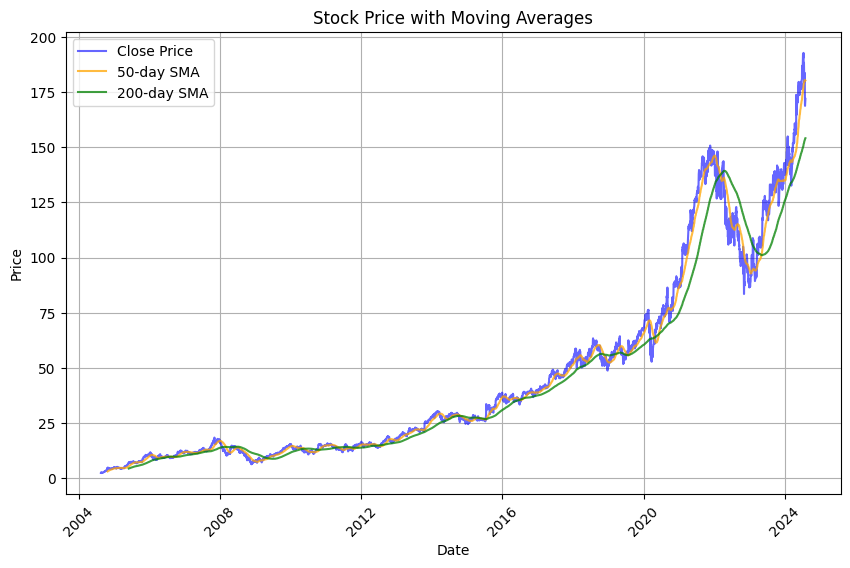

In [38]:
# Plotting stock price with SMA_50 and SMA_200
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='Close Price', color='blue', alpha=0.6)
plt.plot(data['SMA_50'], label='50-day SMA', color='orange', alpha=0.75)
plt.plot(data['SMA_200'], label='200-day SMA', color='green', alpha=0.75)
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**RSI** shows the momentum of the stock, helping identify if it’s overbought or oversold and potential reversal points as mentioned above.


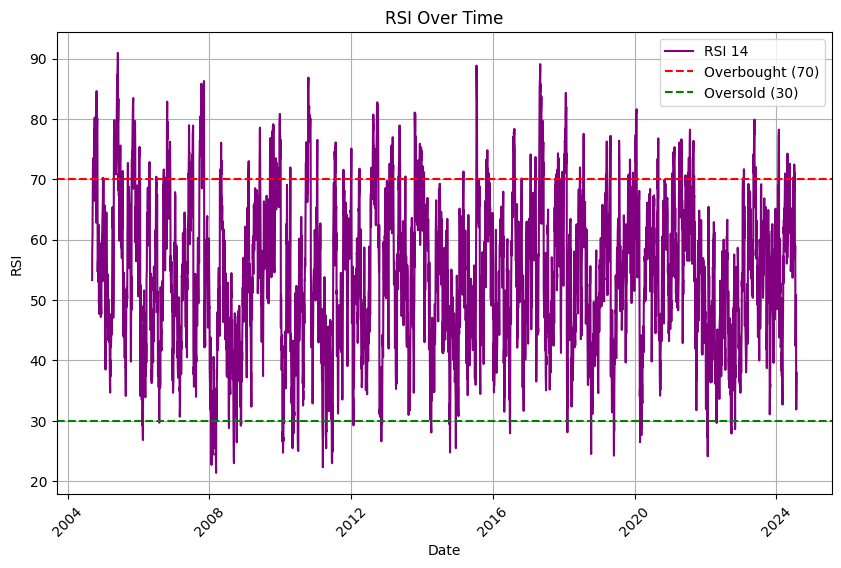

In [37]:
# Plotting RSI_14
plt.figure(figsize=(10,6))
plt.plot(data['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('RSI Over Time')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()